In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from LinearModel import *
import sklearn

In [2]:
emi_com = pd.read_csv("/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/emi_com.csv")
temp = pd.read_csv("/Users/ishitajain/Spring-Invitation-Datathon-2024/Clean Data/temp_trend.csv")


In [3]:
emi_com

,Unnamed: 0,Date,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,0,1973-01-01,0.586164,Distillate Fuel Oil,Petroleum,Residential,22.796,38.890148
1,15083,1973-01-01,0.002308,Petroleum Coke,Petroleum,Electric Power,0.128,55.459511
2,18749,1973-01-01,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
3,14472,1973-01-01,0.062117,Distillate Fuel Oil,Petroleum,Electric Power,2.397,38.588744
4,13861,1973-01-01,2.921715,Total,Petroleum,Transportation,101.775,34.833999
...,...,...,...,...,...,...,...,...
22578,8972,2023-11-01,0.049392,Motor Gasoline,Petroleum,Industrial,1.426,28.871142
22579,9583,2023-11-01,0.141194,Petroleum Coke,Petroleum,Industrial,7.556,53.515160
22580,10194,2023-11-01,0.006932,Residual Fuel Oil,Petroleum,Industrial,0.278,40.106615
22581,11416,2023-11-01,1.024604,Distillate Fuel Oil,Petroleum,Transportation,37.627,36.723455


In [4]:
# Cleaning oil data every time code: 

emi_com['Date'] = pd.to_datetime(emi_com['Date'])



In [5]:
temp.drop('Unnamed: 0', axis=1, inplace=True)
temp.rename(columns={'date': 'Date'}, inplace=True) 
temp['Date'] = pd.to_datetime(temp['Date'])
temp.set_index('Date', inplace=True)
temp.sort_index(inplace=True)
#temp = temp[temp.index.year >= 1973]
temp['anomaly_squared'] = temp['anomaly'] ** 2



In [6]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1985 entries, 1850-07-01 to 2015-11-01
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anomaly          1985 non-null   float64
 1   anomaly_squared  1985 non-null   float64
dtypes: float64(2)
memory usage: 46.5 KB


In [7]:
temp.drop(['Unnamed: 0'],axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [8]:
temp

,anomaly,anomaly_squared
Date,,
1850-07-01,-0.721250,0.520202
1850-08-01,-0.685167,0.469453
1850-09-01,-0.595417,0.354521
1850-10-01,-0.455875,0.207822
1850-11-01,-0.310667,0.096514
...,...,...
2015-07-01,1.553917,2.414657
2015-08-01,1.714125,2.938225
2015-09-01,1.904042,3.625375


In [9]:
emi_com.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
emi_com

,Date,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,1973-01-01,0.586164,Distillate Fuel Oil,Petroleum,Residential,22.796,38.890148
1,1973-01-01,0.002308,Petroleum Coke,Petroleum,Electric Power,0.128,55.459511
2,1973-01-01,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
3,1973-01-01,0.062117,Distillate Fuel Oil,Petroleum,Electric Power,2.397,38.588744
4,1973-01-01,2.921715,Total,Petroleum,Transportation,101.775,34.833999
...,...,...,...,...,...,...,...
22578,2023-11-01,0.049392,Motor Gasoline,Petroleum,Industrial,1.426,28.871142
22579,2023-11-01,0.141194,Petroleum Coke,Petroleum,Industrial,7.556,53.515160
22580,2023-11-01,0.006932,Residual Fuel Oil,Petroleum,Industrial,0.278,40.106615
22581,2023-11-01,1.024604,Distillate Fuel Oil,Petroleum,Transportation,37.627,36.723455


In [11]:
df = pd.merge(temp, emi_com, on='Date', how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24053 entries, 0 to 24052
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           24053 non-null  datetime64[ns]
 1   anomaly                        20501 non-null  float64       
 2   anomaly_squared                20501 non-null  float64       
 3   Consumption (quadrillion Btu)  22583 non-null  float64       
 4   Energy Type                    22583 non-null  object        
 5   Energy Class                   22583 non-null  object        
 6   Sector                         22583 non-null  object        
 7   Emission (Mton Co2)            22583 non-null  float64       
 8   Emission per Consumption       21915 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 1.7+ MB


In [12]:
df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,1850-07-01,-0.721250,0.520202,NaN,NaN,NaN,NaN,NaN,NaN
1,1850-08-01,-0.685167,0.469453,NaN,NaN,NaN,NaN,NaN,NaN
2,1850-09-01,-0.595417,0.354521,NaN,NaN,NaN,NaN,NaN,NaN
3,1850-10-01,-0.455875,0.207822,NaN,NaN,NaN,NaN,NaN,NaN
4,1850-11-01,-0.310667,0.096514,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
24048,2023-11-01,NaN,NaN,0.049392,Motor Gasoline,Petroleum,Industrial,1.426,28.871142
24049,2023-11-01,NaN,NaN,0.141194,Petroleum Coke,Petroleum,Industrial,7.556,53.515160
24050,2023-11-01,NaN,NaN,0.006932,Residual Fuel Oil,Petroleum,Industrial,0.278,40.106615
24051,2023-11-01,NaN,NaN,1.024604,Distillate Fuel Oil,Petroleum,Transportation,37.627,36.723455


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24053 entries, 0 to 24052
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           24053 non-null  datetime64[ns]
 1   anomaly                        20501 non-null  float64       
 2   anomaly_squared                20501 non-null  float64       
 3   Consumption (quadrillion Btu)  22583 non-null  float64       
 4   Energy Type                    22583 non-null  object        
 5   Energy Class                   22583 non-null  object        
 6   Sector                         22583 non-null  object        
 7   Emission (Mton Co2)            22583 non-null  float64       
 8   Emission per Consumption       21915 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 1.7+ MB


In [14]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [15]:
df.drop(['Energy Type'], axis =1, inplace=True)

In [16]:
df.drop(['Sector'], axis =1, inplace=True)

<Axes: xlabel='anomaly', ylabel='Emission per Consumption'>

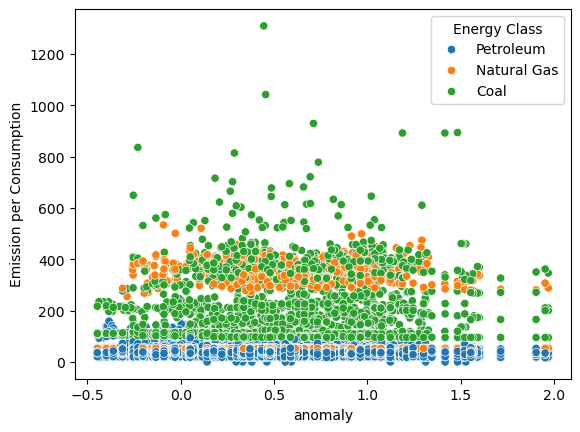

In [17]:
sns.scatterplot(y=df["Emission per Consumption"], x=df["anomaly"], hue=df['Energy Class'])

<Axes: xlabel='anomaly_squared', ylabel='Emission per Consumption'>

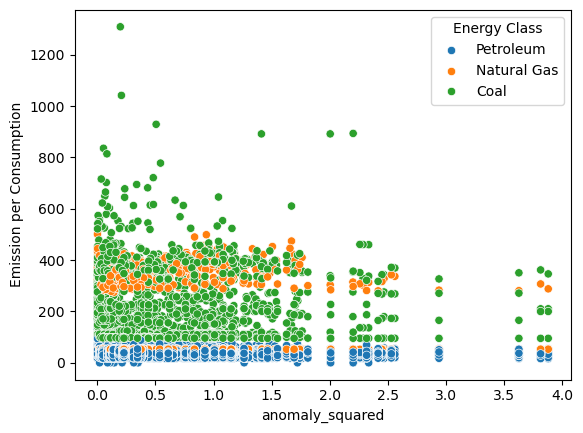

In [18]:
sns.scatterplot(y=df["Emission per Consumption"], x=df["anomaly_squared"], hue=df['Energy Class'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24053 entries, 0 to 24052
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           24053 non-null  datetime64[ns]
 1   anomaly                        20501 non-null  float64       
 2   anomaly_squared                20501 non-null  float64       
 3   Consumption (quadrillion Btu)  22583 non-null  float64       
 4   Energy Class                   22583 non-null  object        
 5   Emission (Mton Co2)            22583 non-null  float64       
 6   Emission per Consumption       21915 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 1.3+ MB


<Axes: >

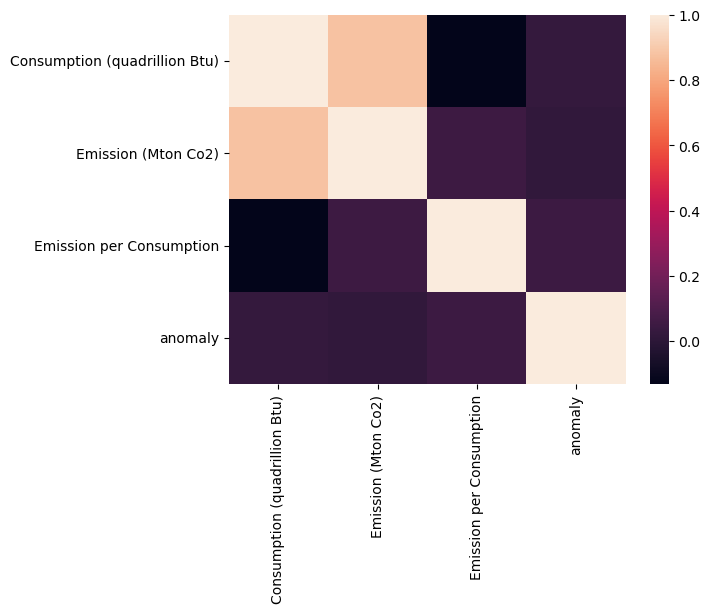

In [17]:
sns.heatmap(df[['Consumption (quadrillion Btu)','Emission (Mton Co2)',	'Emission per Consumption',	'anomaly']].corr())

<Axes: xlabel='Consumption (quadrillion Btu)', ylabel='Emission (Mton Co2)'>

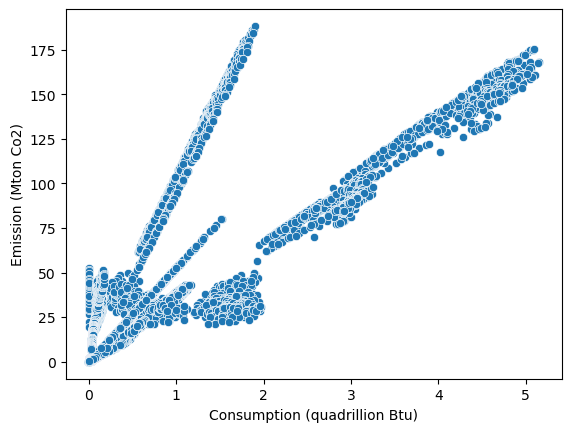

In [18]:
sns.scatterplot(x=df['Consumption (quadrillion Btu)'],y=df['Emission (Mton Co2)'])

<Axes: xlabel='Date'>

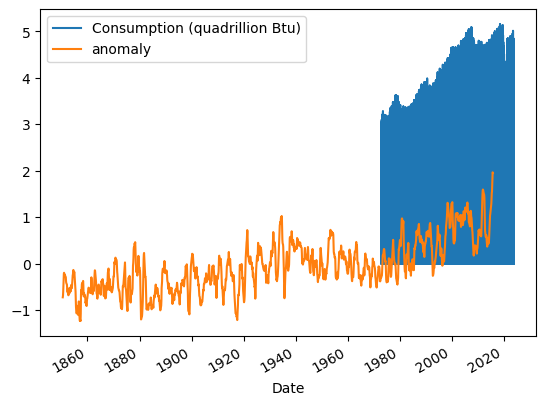

In [19]:
df.plot(x='Date',y=['Consumption (quadrillion Btu)','anomaly'])
# cosumption causes anomaly 

In [20]:
temp['Date'] = pd.to_datetime(temp['Date'])

KeyError: 'Date'

<Axes: xlabel='Date', ylabel='anomaly'>

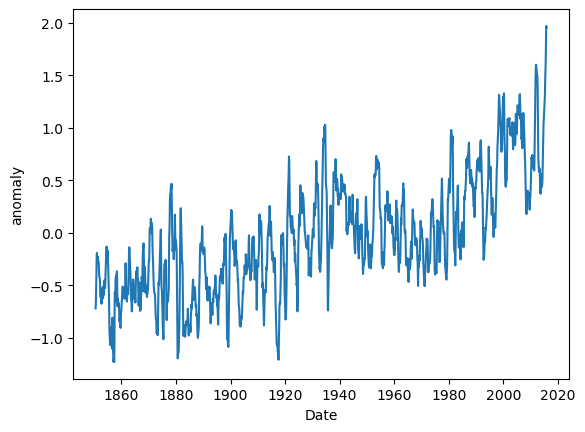

In [21]:
sns.lineplot(x='Date', y='anomaly', data=temp)


In [22]:
df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1850-07-01,-0.721250,0.520202,NaN,NaN,NaN,NaN
1,1850-08-01,-0.685167,0.469453,NaN,NaN,NaN,NaN
2,1850-09-01,-0.595417,0.354521,NaN,NaN,NaN,NaN
3,1850-10-01,-0.455875,0.207822,NaN,NaN,NaN,NaN
4,1850-11-01,-0.310667,0.096514,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
24048,2023-11-01,NaN,NaN,0.049392,Petroleum,1.426,28.871142
24049,2023-11-01,NaN,NaN,0.141194,Petroleum,7.556,53.515160
24050,2023-11-01,NaN,NaN,0.006932,Petroleum,0.278,40.106615
24051,2023-11-01,NaN,NaN,1.024604,Petroleum,37.627,36.723455


<Axes: xlabel='Date', ylabel='Emission per Consumption'>

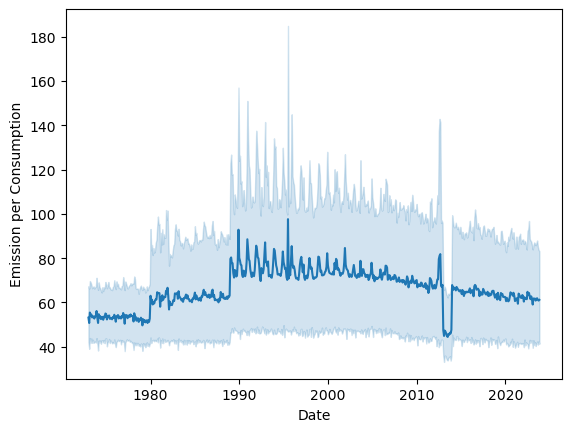

In [23]:
#sns.lineplot(x=emi_com['Date'],y=emi_com['Emission per Consumption'])

In [24]:
temp.reset_index(inplace=True)

In [25]:
temp.drop(['index'],axis=1,inplace=True)

KeyError: "['index'] not found in axis"

In [26]:
temp

,Date,anomaly,anomaly_squared
0,1850-07-01,-0.721250,0.520202
1,1850-08-01,-0.685167,0.469453
2,1850-09-01,-0.595417,0.354521
3,1850-10-01,-0.455875,0.207822
4,1850-11-01,-0.310667,0.096514
...,...,...,...
1980,2015-07-01,1.553917,2.414657
1981,2015-08-01,1.714125,2.938225
1982,2015-09-01,1.904042,3.625375
1983,2015-10-01,1.969167,3.877617


In [27]:
temp

,Date,anomaly,anomaly_squared
0,1850-07-01,-0.721250,0.520202
1,1850-08-01,-0.685167,0.469453
2,1850-09-01,-0.595417,0.354521
3,1850-10-01,-0.455875,0.207822
4,1850-11-01,-0.310667,0.096514
...,...,...,...
1980,2015-07-01,1.553917,2.414657
1981,2015-08-01,1.714125,2.938225
1982,2015-09-01,1.904042,3.625375
1983,2015-10-01,1.969167,3.877617


In [28]:
df

,Date,anomaly,anomaly_squared,Consumption (quadrillion Btu),Energy Class,Emission (Mton Co2),Emission per Consumption
0,1850-07-01,-0.721250,0.520202,NaN,NaN,NaN,NaN
1,1850-08-01,-0.685167,0.469453,NaN,NaN,NaN,NaN
2,1850-09-01,-0.595417,0.354521,NaN,NaN,NaN,NaN
3,1850-10-01,-0.455875,0.207822,NaN,NaN,NaN,NaN
4,1850-11-01,-0.310667,0.096514,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
24048,2023-11-01,NaN,NaN,0.049392,Petroleum,1.426,28.871142
24049,2023-11-01,NaN,NaN,0.141194,Petroleum,7.556,53.515160
24050,2023-11-01,NaN,NaN,0.006932,Petroleum,0.278,40.106615
24051,2023-11-01,NaN,NaN,1.024604,Petroleum,37.627,36.723455


In [29]:
#30-50

<class 'pandas.core.frame.DataFrame'>
Index: 19031 entries, 1470 to 20500
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lag_0    19031 non-null  float64
 1   anomaly  19031 non-null  float64
dtypes: float64(2)
memory usage: 446.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 19030 entries, 1471 to 20500
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lag_1    19030 non-null  float64
 1   anomaly  19030 non-null  float64
dtypes: float64(2)
memory usage: 446.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 19029 entries, 1472 to 20500
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lag_2    19029 non-null  float64
 1   anomaly  19029 non-null  float64
dtypes: float64(2)
memory usage: 446.0 KB
<class 'pandas.core.frame.DataFrame'>
Index: 19028 entries, 1473 to 20500
Data columns (total 2 colu

<Axes: >

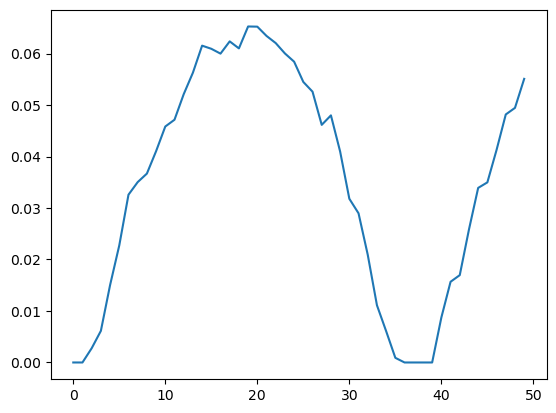

In [30]:
from sklearn.feature_selection import mutual_info_regression 

#  to shift by two month intervals and create columns with lags

for x in range(0,50):

    df['lag_'+str(x)] = df['Consumption (quadrillion Btu)'].shift(x)

# to find the mutual information information between two variables. Chengyi, if you use this make sure to look at the assumptions of this. 
    
lag_mut_info = {}

for i in range(0,50):
    lg = 'lag_'+str(i)
    x = df[[lg,'anomaly']]
    x = x[np.isfinite(x).all(1)]
    x.dropna(inplace=True)
    x.info()


    mutual_info = mutual_info_regression(x.drop(['anomaly'],axis=1),x['anomaly'])
    lag_mut_info[i] = mutual_info[0]
# to find where the ideal lag is 
ideal_lag = 0 
max  = 0 
for i in lag_mut_info:
    if lag_mut_info[i] > max:
        max = lag_mut_info[i]
        ideal_lag = i
print(ideal_lag)

sns.lineplot(lag_mut_info)


#verdict is that 38 months is the best lag for how much to shift anomaly temp for emi/consumption
# 20 month lag for shifting emission to correlate with temp 
# 19 month lag for shifting 


19


<Axes: >

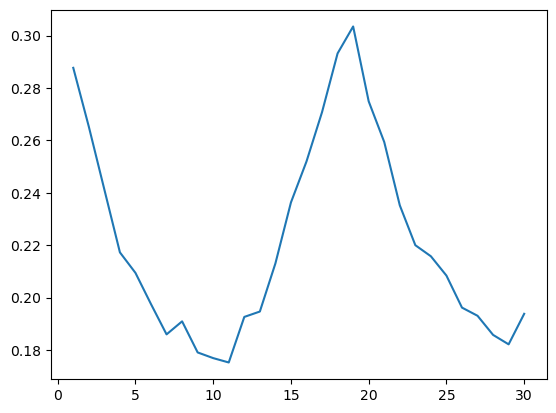

In [135]:
np.all(np.isfinite(x['Emission per Consumption']))

False

In [ ]:
x

0      Date                             1973-07-01 00:00:00
       index                                              6
       anomaly                                     0.179917
       anomaly_squared                              0.03237
       Consumption (quadrillion Btu)               0.517148
                                               ...         
18814  anomaly_squared                             3.812094
       Consumption (quadrillion Btu)               0.000057
       Energy Class                               Petroleum
       Emission (Mton Co2)                            0.002
       Emission per Consumption                   34.874941
Length: 150520, dtype: object

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

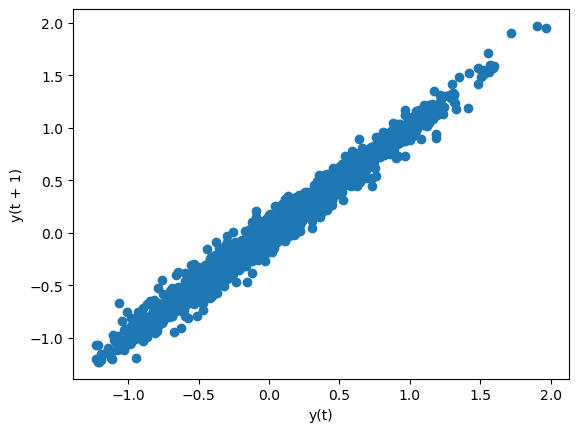

In [86]:
pd.plotting.lag_plot(temp['anomaly'], lag=1)

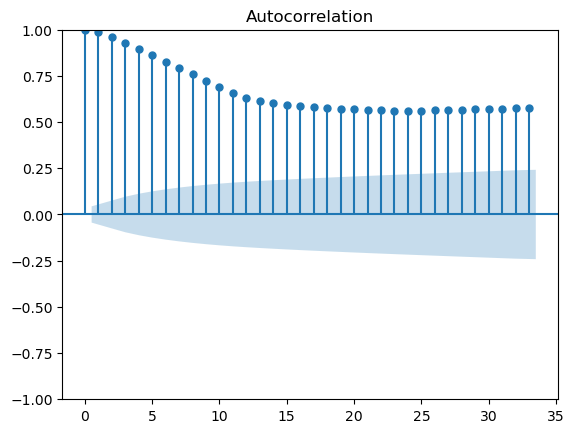

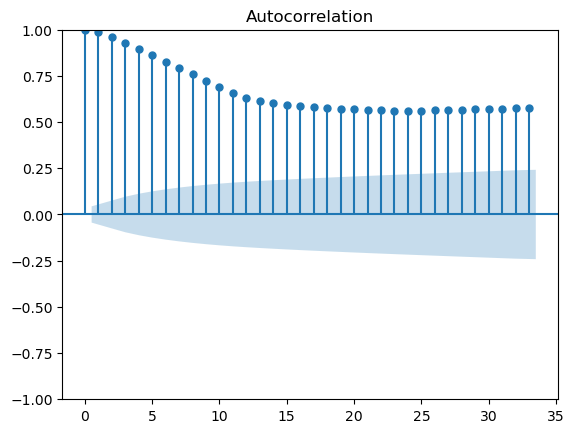

In [88]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(temp['anomaly'])

In [89]:
emi_com

,Unnamed: 0,Date,Consumption (quadrillion Btu),Energy Type,Energy Class,Sector,Emission (Mton Co2),Emission per Consumption
0,0,1973-01-01,0.586164,Distillate Fuel Oil,Petroleum,Residential,22.796,38.890148
1,15083,1973-01-01,0.002308,Petroleum Coke,Petroleum,Electric Power,0.128,55.459511
2,18749,1973-01-01,0.231730,Natural Gas,Natural Gas,Electric Power,12.163,52.487917
3,14472,1973-01-01,0.062117,Distillate Fuel Oil,Petroleum,Electric Power,2.397,38.588744
4,13861,1973-01-01,2.921715,Total,Petroleum,Transportation,101.775,34.833999
...,...,...,...,...,...,...,...,...
22578,8972,2023-11-01,0.049392,Motor Gasoline,Petroleum,Industrial,1.426,28.871142
22579,9583,2023-11-01,0.141194,Petroleum Coke,Petroleum,Industrial,7.556,53.515160
22580,10194,2023-11-01,0.006932,Residual Fuel Oil,Petroleum,Industrial,0.278,40.106615
22581,11416,2023-11-01,1.024604,Distillate Fuel Oil,Petroleum,Transportation,37.627,36.723455


<Axes: xlabel='y(t)', ylabel='y(t + 20)'>

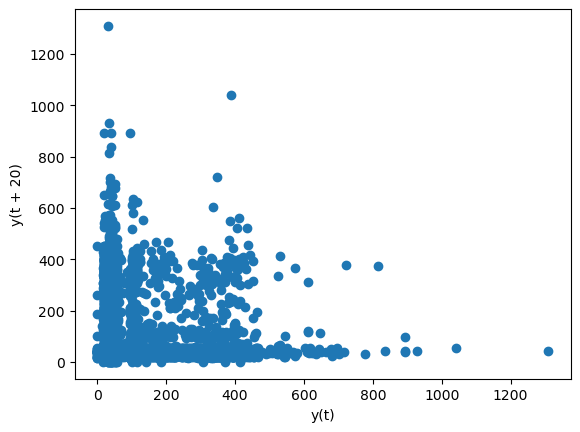

In [94]:
pd.plotting.lag_plot(emi_com['Emission per Consumption'], lag=20)

In [91]:
# exponential time series 